In [1]:
import numpy as np
import pandas as pd
import os,sys

In [2]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
bleaching_data_path = os.path.join(path_data,'bleaching')
mpa_data_path = os.path.join(path_data,'protected_area')

In [3]:
bleaching_data = pd.read_csv(os.path.join(bleaching_data_path,'global_bleaching_environmental_binned.csv'))
mpa_data = pd.read_csv(os.path.join(mpa_data_path,'mpa_counts.csv'))
bleaching_data = bleaching_data.rename(columns={'count':'bleaching_count'})
# bleaching_data = bleaching_data[bleaching_data['bleaching_count'] > 10]
print(bleaching_data.head())
mpa_data = mpa_data.rename(columns={'count':'mpa_count'})
print(mpa_data.head())

      lat_bin       lon_bin  bleaching_count
0  (-80, -75]  (-180, -175]                0
1  (-80, -75]  (-175, -170]                0
2  (-80, -75]  (-170, -165]                0
3  (-80, -75]  (-165, -160]                0
4  (-80, -75]  (-160, -155]                0
      lat_bin       lon_bin  mpa_count
0  (-80, -75]  (-180, -175]          0
1  (-80, -75]  (-175, -170]          0
2  (-80, -75]  (-170, -165]          0
3  (-80, -75]  (-165, -160]          0
4  (-80, -75]  (-160, -155]          0


In [4]:
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)

In [5]:
# first, t test, does bleaching occur more in non-MPAs than MPAs? (Marine Protected Areas)
from scipy import stats
merged_data = pd.merge(bleaching_data, mpa_data, on=['lat_bin', 'lon_bin'], how='outer')
merged_data.fillna(0, inplace=True)
merged_data = merged_data[(merged_data['mpa_count'] != 0) | (merged_data['bleaching_count'] != 0)]
mpa_bleaching = merged_data[merged_data['mpa_count'] > 0]['bleaching_count']
non_mpa_bleaching = merged_data[merged_data['mpa_count'] == 0]['bleaching_count']
# Areas without MPAs
t_stat, p_value = stats.ttest_ind(mpa_bleaching, non_mpa_bleaching, equal_var=False, trim=0.05)
# Print the results
print(f"T-statistic (trimmed): {t_stat}")
print(f"P-value (trimmed): {p_value}")
# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bleaching between MPAs and non-MPAs.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bleaching between MPAs and non-MPAs.")
if p_value < 0.05:
    print('MPAs may be located in regions that are more prone to bleaching due to environmental conditions. MPAs may have been established in response to bleaching, so they might be located in areas already experiencing high stress. There might be a lag in the effectiveness of MPAs; newly established MPAs might not yet have had the time to contribute to the recovery and resilience of coral reefs.')

T-statistic (trimmed): -2.4717715256372954
P-value (trimmed): 0.015358271717013991
Reject the null hypothesis: There is a significant difference in bleaching between MPAs and non-MPAs.
MPAs may be located in regions that are more prone to bleaching due to environmental conditions. MPAs may have been established in response to bleaching, so they might be located in areas already experiencing high stress. There might be a lag in the effectiveness of MPAs; newly established MPAs might not yet have had the time to contribute to the recovery and resilience of coral reefs.


In [9]:
u_stat, p_value = stats.mannwhitneyu(mpa_bleaching, non_mpa_bleaching, alternative='two-sided')

# Print the results
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bleaching between MPAs and non-MPAs.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bleaching between MPAs and non-MPAs.")

U-statistic: 686.5
P-value: 4.1733084719119223e-14
Reject the null hypothesis: There is a significant difference in bleaching between MPAs and non-MPAs.


<Figure size 1200x800 with 0 Axes>

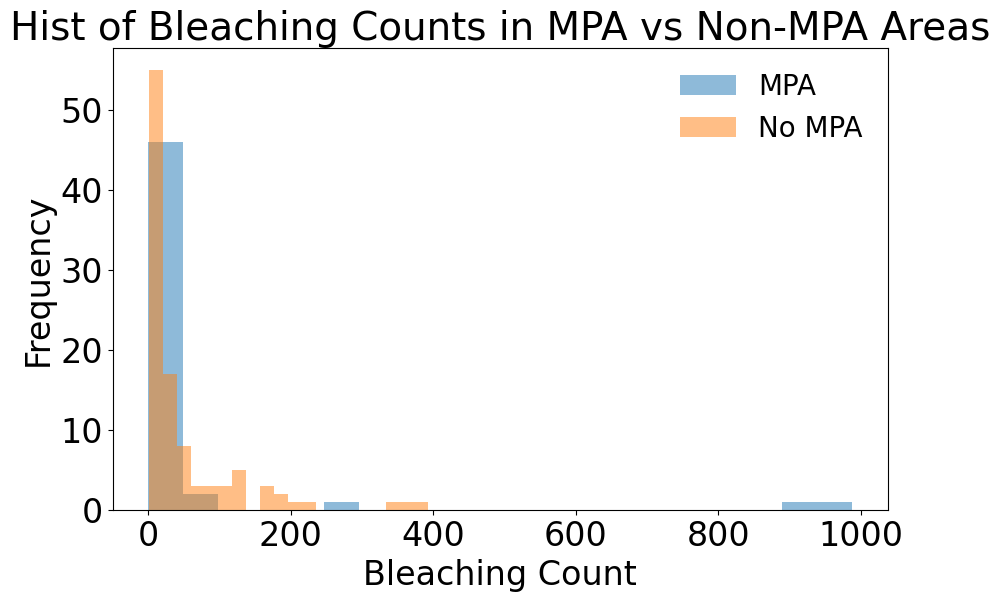

In [14]:
import matplotlib.pyplot as plt
fontsize = 24
fontsize_title = 28
plt.figure(figsize=(12, 8))
merged_data['MPA_Presence'] = merged_data['mpa_count'].apply(lambda x: 'MPA' if x > 0 else 'No MPA')
plt.figure(figsize=(10, 6))
plt.hist(merged_data[merged_data['MPA_Presence'] == 'MPA']['bleaching_count'], bins=20, alpha=0.5, label='MPA')
plt.hist(merged_data[merged_data['MPA_Presence'] == 'No MPA']['bleaching_count'], bins=20, alpha=0.5, label='No MPA')
plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.title('Hist of Bleaching Counts in MPA vs Non-MPA Areas', fontsize=fontsize_title)
plt.xlabel('Bleaching Count', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
# plt.text(0.95, 0.5, f'Mann-Whitney U test p-value: {p_value:.2e}', transform=plt.gca().transAxes,
#          fontsize=fontsize, verticalalignment='top', horizontalalignment='right')

plt.tick_params(axis='both', which='major', labelsize=fontsize)
filename = os.path.join(save_fig_folder,'hist_bleaching_mpa.png')
plt.savefig(filename, dpi=300)
plt.show()